# Pokemon Data Analysis 

## Introduction

The undertaken project focused on developing a Pokémon database system, commonly referred to as a Pokédex, by employing Python and PostgreSQL. The primary goal was to compile and store comprehensive information about diverse Pokémon species, sourced from https://pokemondb.net/, and present this data in a structured database. This initiative served as a personal project, aiming to highlight my competencies in SQL, Python, and Data Analysis.

Python was selected as the primary programming language for project implementation. The utilization of libraries such as Beautiful Soup and Requests facilitated web scraping of Pokémon data from the designated website, enabling the extraction of details like Pokémon names, types, abilities, and stats.

The integration of Pandas, a potent data manipulation library in Python, played a pivotal role in refining and processing the scraped data. It provided the means to convert raw web data into a structured format suitable for insertion into the database.

For the creation and management of the Pokémon database, PostgreSQL, a robust relational database management system, was employed. SQL was instrumental in defining the schema, establishing tables, and inserting data, ensuring that the information was well-organized and easily retrievable through queries.

To summarize, this project served as a demonstration of my proficiency in Python, expertise in data manipulation using Pandas, and competence in SQL-based database management. It represented a valuable opportunity to enhance skills in web scraping, data cleaning, and database design, underscoring the developer's capabilities in these critical domains.

### Tasks of the project:
1. Which type has more pokemon?
2. Which region has introduced more pokemon?
3. Top 10 strongest and weakest non legenday pokemon?(Excludes mega evolve)
4. Top 10 weakest and strongest pokemon from each type? (Excludes mega evolve and legendary pokemons)
5. Top 5 strongest legendary pokemon? (Excludes mega evolve) 


### Steps of the project:
1. **Data Collection:** Created web scrapper using python to collect the pokemon data from https://pokemondb.net/.
2. **Data Cleaning:** After collecting the data if has been arranged and cleaned using Libre Office Clac, and opensource and free alternative of Microsoft excel. And for further processing of the data, I have created a Database using postgresql. I have used SQL to quickly clean the data and add additonal informations about the pokemons like, the regions they were intruduced, assigning the legendary pokemons etc.
![ER Diagram of the Database](/home/rakib/Projects/pokemon_analysis/kcvwfryw - public - pokemon.png)
3. **Analyzing the Data:** And Finally Python and Pandas was used to analyze the data and find the answers of the following tasks mentioned above.


## Processing the data

In [1]:
# Import Required libraries

import pandas as pd
import psycopg2
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


**Connect to the database**

In [3]:
# Define the connection parameters
conn = psycopg2.connect(
    host="satao.db.elephantsql.com",
    database="kcvwfryw",
    user="kcvwfryw",
    password="WqfcEZ66jLgOVgacQ6IJYTtELlfkSaS9")

cursor = conn.cursor()



**Inspecting the database**

In [ ]:
query = """select * from pokemon;"""

In [ ]:
cursor.execute(query)

results = []

for i, data in enumerate(cursor):
    results.append(data)


In [ ]:
data_table = pd.DataFrame(results, columns= ['Poke ID','Name','Type 1', 'Type 2','Hp','Attack','Defense',
                                             'Special Attack','Special Defense','Speed', 'Legendary','Region ID','Game ID', 'Mega Evlove'])
data_table.head(20)

,Poke ID,Name,Type 1,Type 2,Hp,Attack,Defense,Special Attack,Special Defense,Speed,Legendary,Region ID,Game ID,Mega Evlove
0,771,Thundurus Therian Forme,Electric,Flying,79,105,70,145,80,101,False,5,11,False
1,248,Yanma,Bug,Flying,65,65,45,75,45,95,False,2,3,False
2,164,Scyther,Bug,Flying,70,110,80,55,80,105,False,1,1,False
3,1025,Obstagoon,Dark,Normal,93,90,101,60,81,95,False,8,18,False
4,849,Pumpkaboo Average Size,Ghost,Grass,49,66,70,44,55,51,False,6,13,False
5,850,Pumpkaboo Small Size,Ghost,Grass,44,66,70,44,55,56,False,6,13,False
6,851,Pumpkaboo Large Size,Ghost,Grass,54,66,70,44,55,46,False,6,13,False
7,852,Pumpkaboo Super Size,Ghost,Grass,59,66,70,44,55,41,False,6,13,False
8,78,Growlithe Hisuian Growlithe,Fire,Rock,60,75,45,65,50,55,False,1,1,False
9,80,Arcanine Hisuian Arcanine,Fire,Rock,95,115,80,95,80,90,False,1,1,False


In [ ]:
df_pulled = pd.DataFrame(results)
df_pulled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1195 non-null   int64 
 1   1       1195 non-null   object
 2   2       1195 non-null   object
 3   3       653 non-null    object
 4   4       1195 non-null   int64 
 5   5       1195 non-null   int64 
 6   6       1195 non-null   int64 
 7   7       1195 non-null   int64 
 8   8       1195 non-null   int64 
 9   9       1195 non-null   int64 
 10  10      1195 non-null   bool  
 11  11      1195 non-null   int64 
 12  12      1195 non-null   int64 
 13  13      1195 non-null   bool  
dtypes: bool(2), int64(9), object(3)
memory usage: 114.5+ KB


In [ ]:
df_pulled.shape

(1195, 14)

In [ ]:
df_pulled.describe()

0     8
4     8
5     8
6     8
7     8
8     8
9     8
11    8
12    8
dtype: int64

## Exploratory Data Analysis

#### 1.Which type has more pokemon?

In [ ]:
query = """select type1, count(type1)  as count from pokemon group by type1 order by  count desc;"""
cursor.execute(query)

results = []

for i, data in enumerate(cursor):
    results.append(data)

In [ ]:
df = pd.DataFrame(results, columns= ['Type','Number of Pokemon'])
df

,Type,Number of Pokemon
0,Water,166
1,Normal,115
2,Grass,105
3,Bug,91
4,Psychic,82
5,Fire,75
6,Electric,73
7,Rock,67
8,Dark,56
9,Fighting,50


Create a barchart

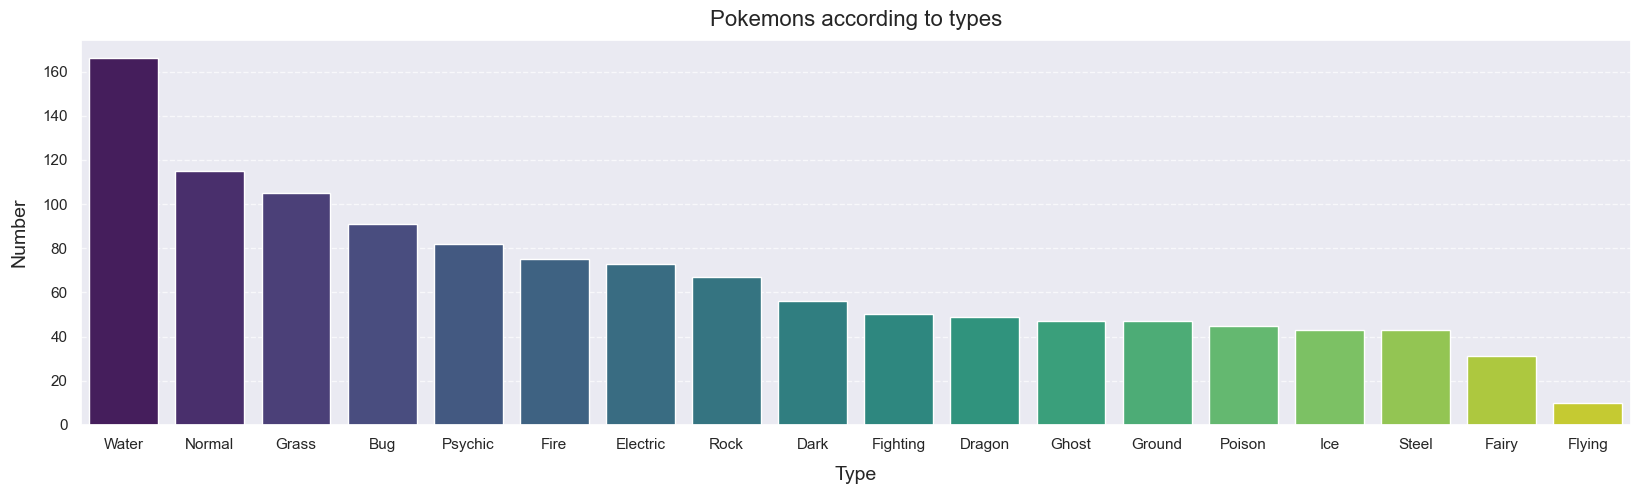

In [ ]:
sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.barplot(x=df.iloc[:, 0], y=df.iloc[:, 1], palette='viridis')
plt.xlabel('Type', fontsize=14, labelpad=10)
plt.ylabel('Number', fontsize=14, labelpad=10)
plt.title('Pokemons according to types', fontsize=16, pad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Make a Pie-chart

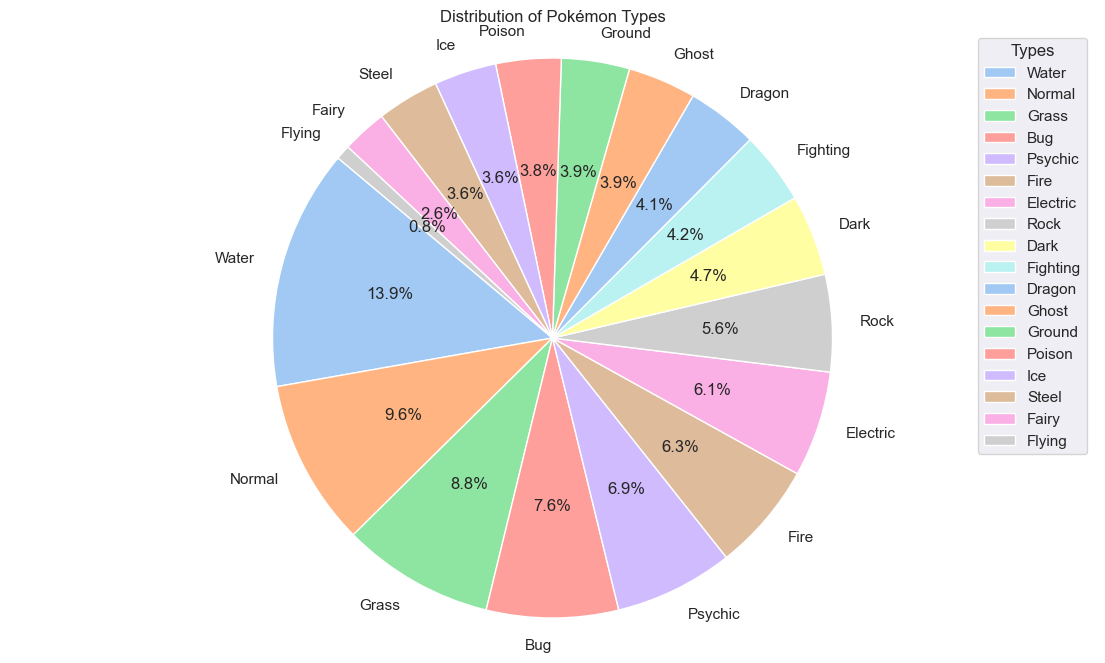

In [ ]:
plt.figure(figsize=(14, 8))

labels = df.iloc[:, 0]
sizes = df.iloc[:, 1]
colors = sns.color_palette('pastel')[0:len(labels)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Pokémon Types')
plt.legend(labels, title='Types', loc='upper right', bbox_to_anchor=(1, 1))
plt.axis('equal')
plt.show()

The provided charts clearly illustrate a significant prevalence of Water-type Pokémon, making up the largest category at 13.9% of all species. In contrast, Flying-type Pokémon are notably scarce, comprising just 0.8% of the total. This data highlights the diversity within the Pokémon universe, with aquatic creatures being highly represented, while avian creatures are relatively rare. The distribution of types adds depth and variety to the Pokémon world, offering a wide range of strengths, weaknesses, and strategic opportunities for trainers.

#### 2. Top 10 Water-type pokemon

In [ ]:
query = """select name, SUM(hp + attack + defense + sp_attack + sp_def + speed) as CP from pokemon where 
type1 = 'Water'and mega_evolve = false 
and legendary = false group by name ORDER BY CP desc limit 10;"""
cursor.execute(query)

results = []

for i, data in enumerate(cursor):
    results.append(data)


In [ ]:
df = pd.DataFrame(results, columns= ['Name','Combat Power'])
df

,Name,Combat Power
0,Palafin Hero Form,650
1,Greninja Ash-Greninja,640
2,Wishiwashi School Form,620
3,Meloetta Aria Forme,600
4,Meloetta Pirouette Forme,600
5,Walking Wake,590
6,Keldeo Ordinary Form,580
7,Keldeo Resolute Form,580
8,Tapu Fini,570
9,Kingdra,540


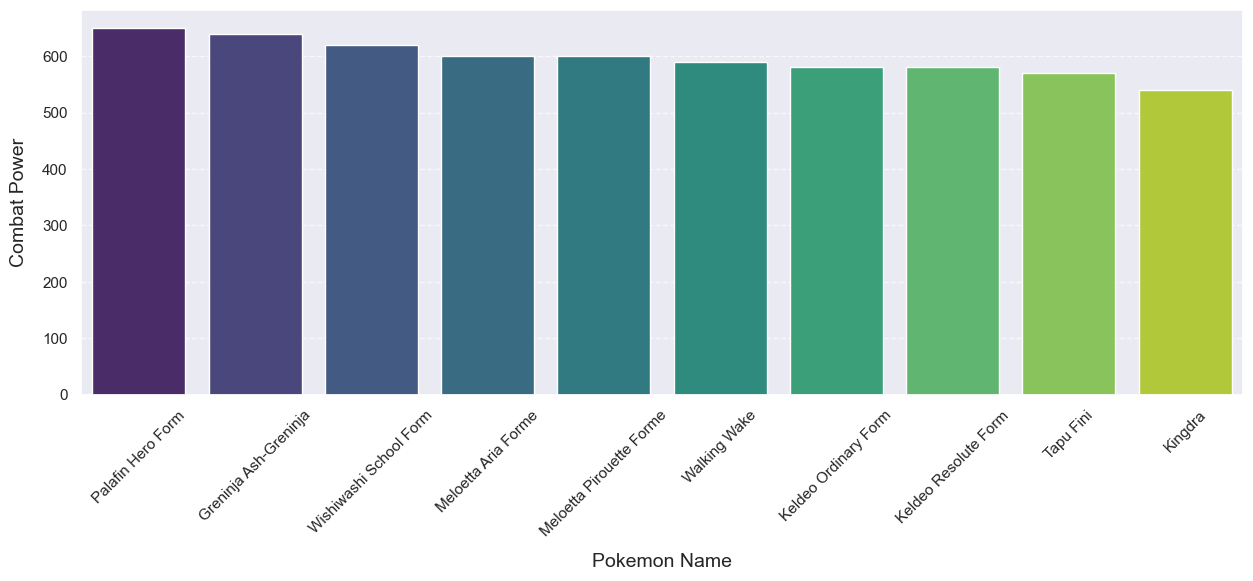

In [ ]:
sns.set(rc={'figure.figsize': (15, 5)})
ax = sns.barplot(x=df.iloc[:, 0], y=df.iloc[:, 1], palette='viridis')
plt.xlabel('Pokemon Name', fontsize=14, labelpad=10)
plt.ylabel('Combat Power', fontsize=14, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

#### 3. Top 10 weakest Pokemon

In [ ]:
query = """select name as Name, type1 as Type, SUM(hp + attack + defense + sp_attack + sp_def + speed) as CP from pokemon where 
mega_evolve = false 
and legendary = false group by name, type1 ORDER BY CP asc limit 10;"""
cursor.execute(query)

results = []

for i, data in enumerate(cursor):
    results.append(data)


In [ ]:
df = pd.DataFrame(results, columns= ['Name','Type','Combat Power'])
df

,Name,Type,Combat Power
0,Wishiwashi Solo Form,Water,175
1,Blipbug,Bug,180
2,Sunkern,Grass,180
3,Snom,Ice,185
4,Azurill,Normal,190
5,Kricketot,Bug,194
6,Wurmple,Bug,195
7,Weedle,Bug,195
8,Caterpie,Bug,195
9,Ralts,Psychic,198


#### 4. Pokemon Introducted by Regions

In [ ]:
query = """select region_name, count(region_name)  from pokemon left join region on region_id = region.id group by region_name; """
cursor.execute(query)

results = []

for i, data in enumerate(cursor):
    results.append(data)

In [ ]:
df = pd.DataFrame(results, columns= ['Region','Number of Pokemon'])
df

,Region,Number of Pokemon
0,Johto,106
1,Kanto,189
2,Hoenn,161
3,Alola,100
4,Paldea,115
5,Unova,176
6,Galar,109
7,Sinnoh,120
8,Kalos,119


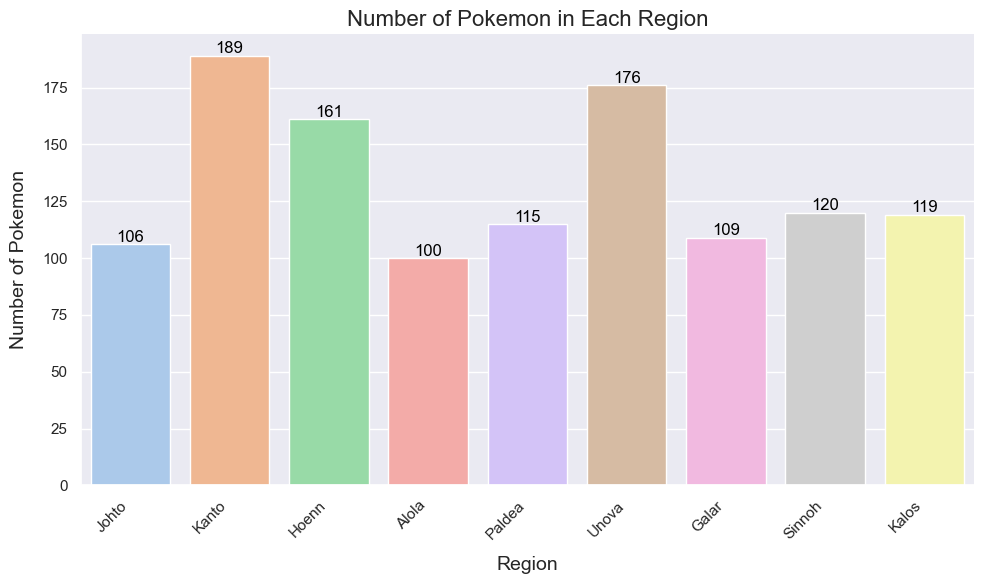

In [ ]:
sns.set_palette("pastel")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Region', y='Number of Pokemon')

plt.xlabel('Region', fontsize=14, labelpad=10)
plt.ylabel('Number of Pokemon', fontsize=14, labelpad=10)
plt.title('Number of Pokemon in Each Region', fontsize=16)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

sns.despine()

plt.tight_layout()
plt.show()


The chart provides data on the number of Pokemon in various regions within the Pokemon universe. This data is essential for understanding the distribution of Pokemon species across different in-game regions, and it holds significance for both game enthusiasts and researchers studying the Pokemon franchise.

The chart encompasses nine different regions, with Kanto having the highest number of Pokemon species at 189, making it one of the most iconic and well-established regions in the series. Following closely are Unova with 176 species and Hoenn with 161, highlighting the diversity of Pokemon across different generations of games. On the other end of the spectrum, we find Alola with 100 species and Galar with 109 species, representing regions from the more recent Pokemon games. The chart illustrates how the number of Pokemon can vary significantly from one region to another, emphasizing the importance of each region's unique characteristics and ecosystems in shaping the diversity of Pokemon species.

In summary, this chart provides a concise overview of the number of Pokemon in various regions, shedding light on the franchise's evolving world-building and game development over the years. It showcases the rich variety of Pokemon across different regions, which has been a key factor in the enduring popularity and appeal of the Pokemon series among fans and players worldwide.

#### 5. Top 5 strongest legendary Pokemon ####

In [ ]:

query = """select name, SUM(hp + attack + defense + sp_attack + sp_def + speed) as CP, 
type1 from pokemon where mega_evolve = false and legendary = true group by name, type1 order by CP desc limit 5; """
cursor.execute(query)

results = []

for i, data in enumerate(cursor):
    results.append(data)

conn.close()
cursor.close()

In [ ]:
df = pd.DataFrame(results, columns= ['Name','Combat Power','Type'])
df

,Name,Combat Power,Type
0,Groudon Primal Groudon,770,Ground
1,Kyogre Primal Kyogre,770,Water
2,Arceus,720,Normal
3,Eternatus,690,Poison
4,Xerneas,680,Fairy


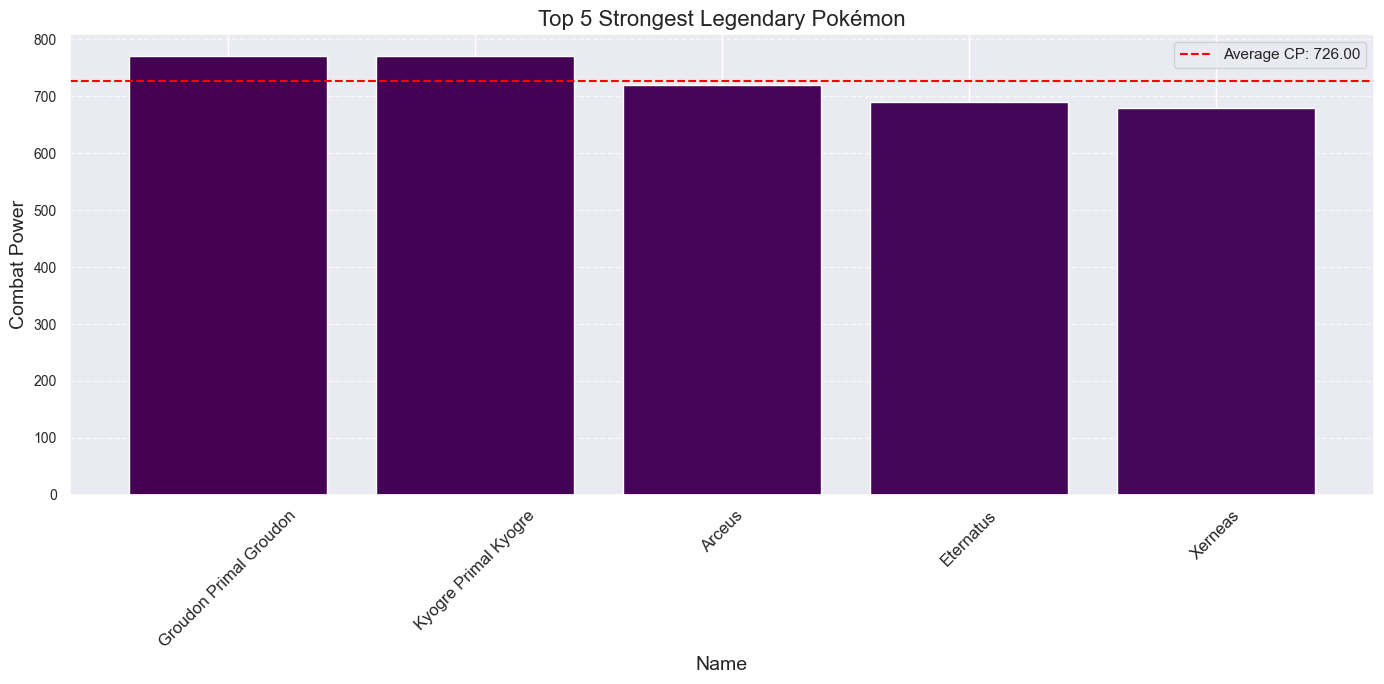

In [ ]:
top5_df = df.sort_values(by='Combat Power', ascending=False).head(5)

colors = plt.cm.viridis(range(len(top5_df)))

plt.figure(figsize=(14, 7)) 

plt.bar(top5_df['Name'], top5_df['Combat Power'], color=colors)
plt.xlabel('Name', fontsize=14)
plt.ylabel('Combat Power', fontsize=14)
plt.title('Top 5 Strongest Legendary Pokémon', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
average_cp = top5_df['Combat Power'].mean()
plt.axhline(y=average_cp, color='red', linestyle='--', label=f'Average CP: {average_cp:.2f}')
plt.legend()
plt.tight_layout()
plt.show()




The chart displays a list of Legendary Pokémon along with their names, Combat Power (CP), and respective types. The CP is a calculated value derived from the sum of the Pokémon's individual stats, such as HP, attack, defense, special attack, special defense, and speed. Among the Pokémon listed, Groudon Primal Groudon and Kyogre Primal Kyogre share the highest CP of 770, both representing the Ground and Water types, respectively. Arceus follows closely with a CP of 720, classified as a Normal type. Eternatus and Xerneas have CP values of 690 and 680, respectively, and are associated with the Poison and Fairy types. These Pokémon are notable for their legendary status and formidable CP, making them highly sought after and powerful additions to any Pokémon collection.

## Conclusion ##

This project has not only provided me with a robust database for Pokémon enthusiasts but has also demonstrated my proficiency in web scraping, data cleaning, database design, and data analysis. It has enriched my understanding of Pokémon statistics, types, and characteristics, offering me a valuable resource for my personal interest in the Pokémon world. Additionally, it showcases my skills in Python, Pandas, and SQL, which are highly transferable to other data-centric projects. This project stands as a testament to the power of programming and data management in bringing order and insight to complex datasets, and it has been a fulfilling journey of learning and exploration. make markdown